<a href="https://colab.research.google.com/github/Shrimadh/ANN-on-Churn-Modelling-dataset/blob/master/ANN_on_Churn_Modelling_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]
display(X.head())
Y.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [4]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [5]:
X = pd.concat([X,geography,gender],axis=1)
X = X.drop(["Geography","Gender"],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(8000, 11)

In [8]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU , ELU
from keras.layers import Dropout

In [9]:
classifier = Sequential()
classifier.add(Dense(units = 6 ,kernel_initializer = "he_uniform",activation='relu',input_dim=11))
classifier.add(Dense(units = 6 ,kernel_initializer= "he_uniform",activation='relu'))
classifier.add(Dense(units = 1 ,kernel_initializer= "glorot_uniform",activation='sigmoid'))


In [10]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6124 - accuracy: 0.7621 - val_loss: 0.5448 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7964 - val_loss: 0.4874 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4629 - accuracy: 0.8007 - val_loss: 0.4654 - val_accuracy: 0.7986
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4431 - accuracy: 0.8080 - val_loss: 0.4556 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.8119 - val_loss: 0.4487 - val_accuracy: 0.8050
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.8166 - val_loss: 0.4433 - val_accuracy: 0.8069
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8207 - val_loss: 0.4383 - val_accuracy: 0.8095

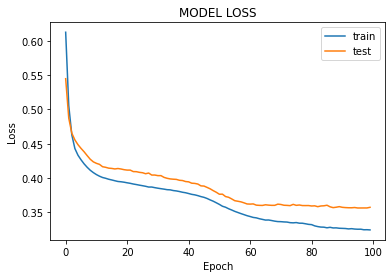

In [12]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'])
plt.show()

In [13]:
predictions = classifier.predict(X_test)
y_pred = (predictions>=0.5)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)
score

0.855

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.activations import relu,sigmoid

In [15]:
def create_model(layers,activation):
  model = Sequential()
  for i , nodes in enumerate(layers):
    if i==0 :
      model.add(Dense(nodes,activation = activation,input_dim=X_train.shape[1]))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes,activation = activation))
      model.add(Dropout(0.3))
  model.add(Dense(units=1 , kernel_initializer='glorot_uniform',activation = 'sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [16]:
model = KerasClassifier(build_fn = create_model)

In [17]:
layers = [(20),(40,20),(45,30,15)]
activations = ['relu','sigmoid']
param_grid = dict(layers = layers , activation = activations , batch_size = [128,256],epochs = [30])
grid = GridSearchCV(estimator = model , param_grid = param_grid , cv = 5)
grid_result = grid.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


Epoch 1/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6486
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7877
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7989
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8055
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8094
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8138
Epoch 7/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8167
Epoch 8/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8161
Epoch 9/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8269
Epoch 10/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8234
Epoch 11/30
50/50 [

In [18]:
print(grid_result.best_score_,grid_result.best_params_)

0.8576250076293945 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (45, 30, 15)}
